In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ali\Desktop\Data Analysis Projects\turing\cardio_base.csv")

In [3]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
5,8,21914,1,151,67.0,120,80,2,0
6,9,22113,1,157,93.0,130,80,3,0
7,12,22584,2,178,95.0,130,90,3,0
8,13,17668,1,158,71.0,110,70,1,0
9,14,19834,1,164,68.0,110,60,1,0


In [4]:
# Convert age from days to years
df['age_years'] = (df['age'] // 365).astype(int)  # Assuming a year has 365.25 days to account for leap years

In [5]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47
5,8,21914,1,151,67.0,120,80,2,0,60
6,9,22113,1,157,93.0,130,80,3,0,60
7,12,22584,2,178,95.0,130,90,3,0,61
8,13,17668,1,158,71.0,110,70,1,0,48
9,14,19834,1,164,68.0,110,60,1,0,54


In [6]:
# Calculate average weight for each age group
average_weight_by_age = df.groupby('age_years')['weight'].mean()

# Identify age group with the highest and lowest average weight
max_weight_age_group = average_weight_by_age.idxmax()
min_weight_age_group = average_weight_by_age.idxmin()

# Calculate the difference in average weight
weight_difference = average_weight_by_age[max_weight_age_group] - average_weight_by_age[min_weight_age_group]

print(f"The age group with the highest average weight ({max_weight_age_group} years) is {weight_difference:.2f} kg heavier than the age group with the lowest average weight ({min_weight_age_group} years).")

The age group with the highest average weight (63 years) is 16.87 kg heavier than the age group with the lowest average weight (30 years).


In [7]:
df.shape

(70000, 10)

In [8]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke', 'age_years'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   age_years    70000 non-null  int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 5.1 MB


In [10]:
df.describe

<bound method NDFrame.describe of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0          0  18393       2     168    62.0    110     80            1      0   
1          1  20228       1     156    85.0    140     90            3      0   
2          2  18857       1     165    64.0    130     70            3      0   
3          3  17623       2     169    82.0    150    100            1      0   
4          4  17474       1     156    56.0    100     60            1      0   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  99993  19240       2     168    76.0    120     80            1      1   
69996  99995  22601       1     158   126.0    140     90            2      0   
69997  99996  19066       2     183   105.0    180     90            3      0   
69998  99998  22431       1     163    72.0    135     80            1      0   
69999  99999  20540       1     170    72.0    120     80            2     

In [11]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
age_years        int32
dtype: object

In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
age_years      0
dtype: int64

# Age Distribution:

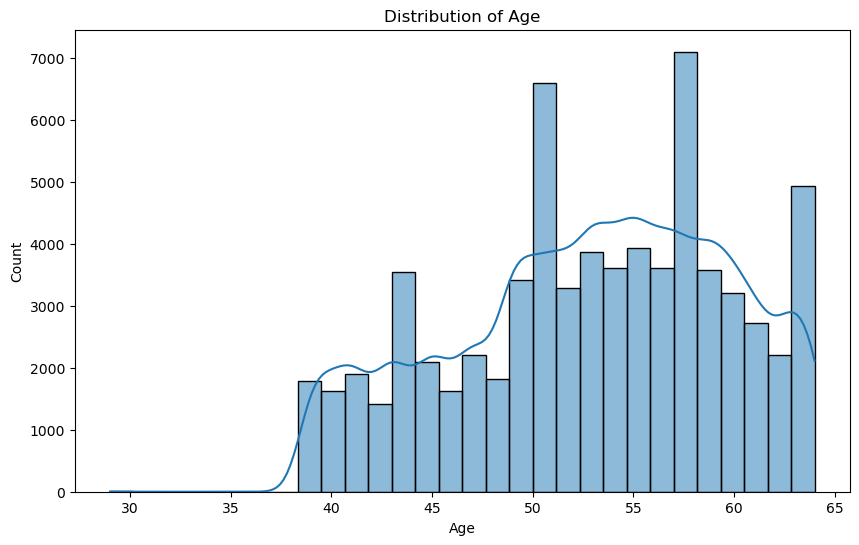

In [13]:
# Visualize the distribution of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

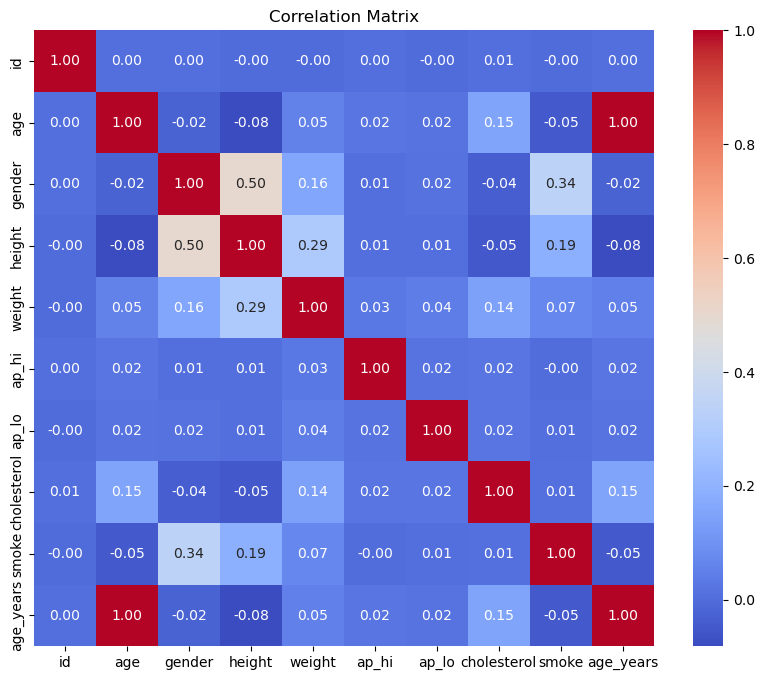

In [14]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
df['gender'].unique()

array([2, 1], dtype=int64)

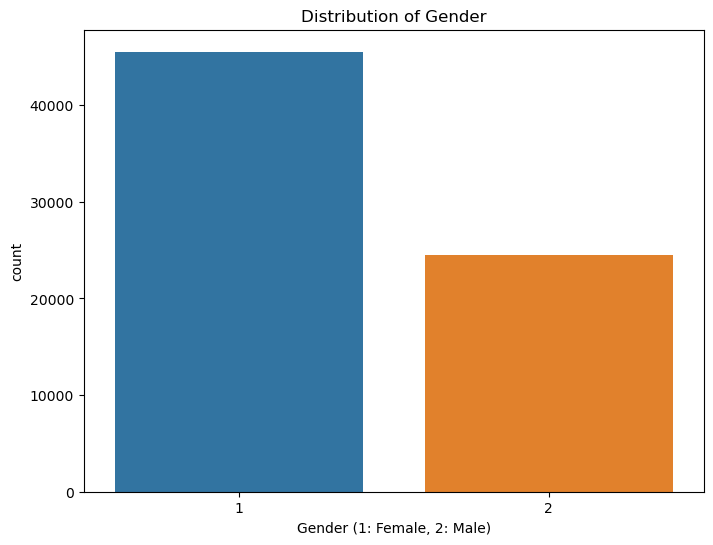

In [16]:
# Countplot of the 'gender' column
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.show()

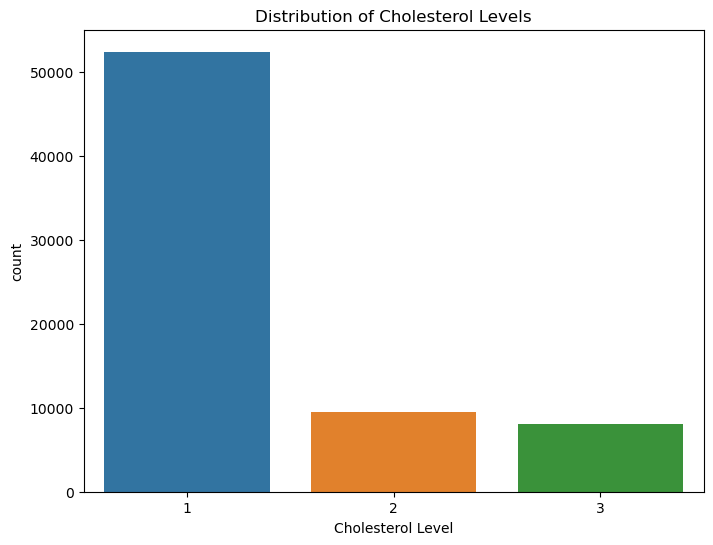

In [17]:
# Countplot of the 'cholesterol' column
plt.figure(figsize=(8, 6))
sns.countplot(x='cholesterol', data=df)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.show()

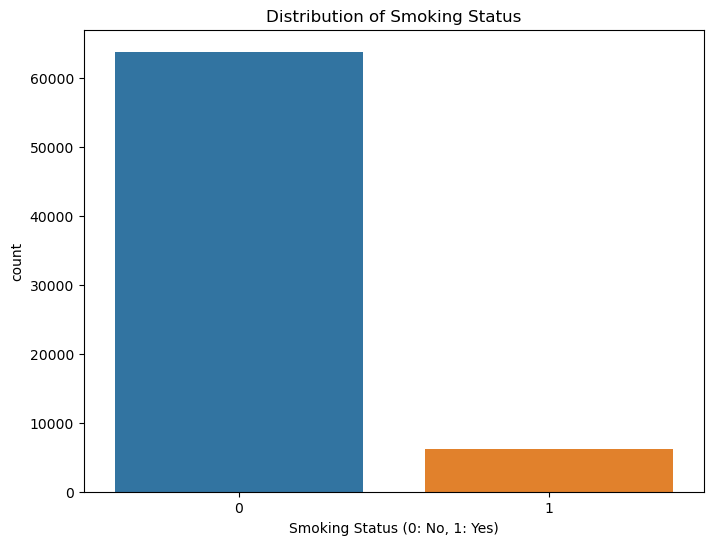

In [18]:
# Countplot of the 'smoke' column
plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', data=df)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status (0: No, 1: Yes)')
plt.show()

# Blood Pressure Analysis:

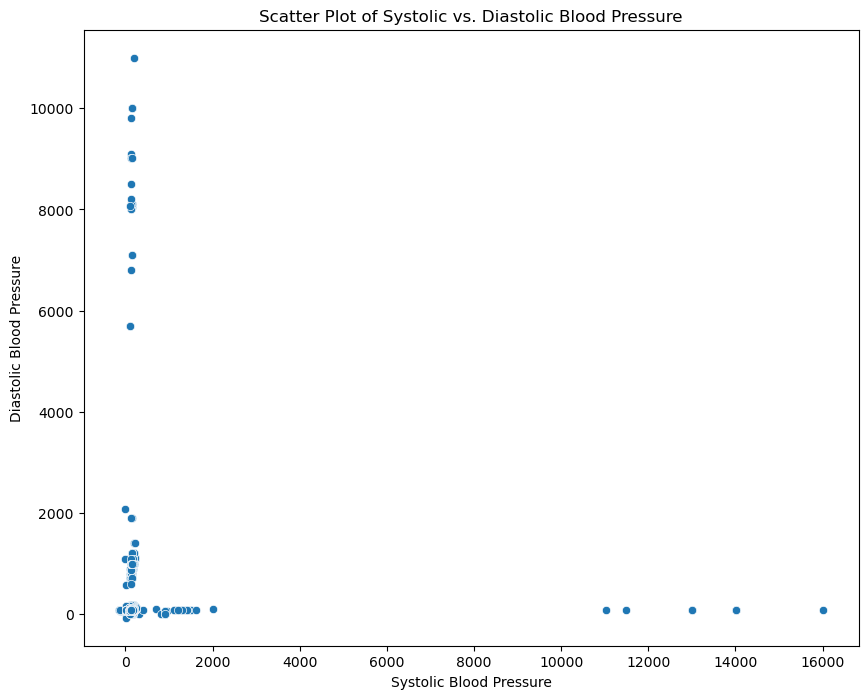

In [19]:
# Scatter plot of systolic vs. diastolic blood pressure
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ap_hi', y='ap_lo', data=df)
plt.title('Scatter Plot of Systolic vs. Diastolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

# Body Mass Index (BMI) Calculation:

In [20]:
# Calculate BMI (weight in kg / (height in m)^2)
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

In [21]:
df['bmi']

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: bmi, Length: 70000, dtype: float64

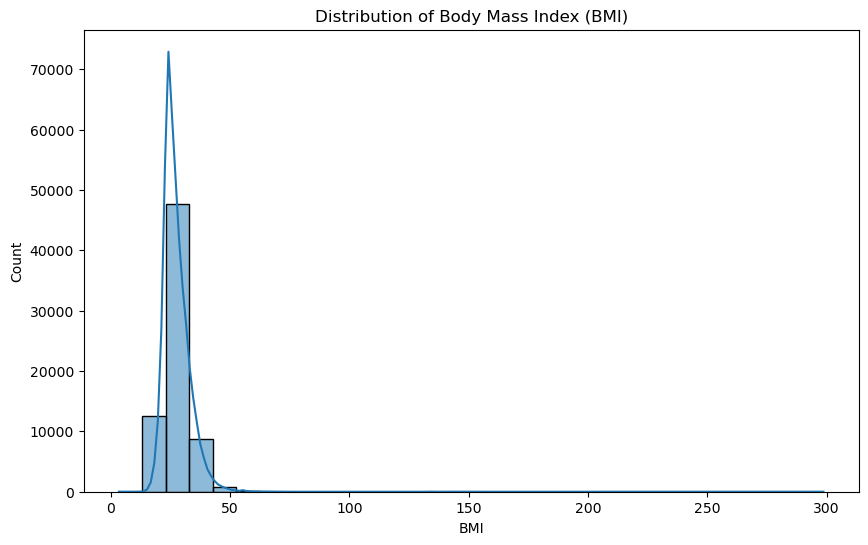

In [22]:
# Histogram of BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI')
plt.show()

# Cardiovascular Disease (CVD) Risk Analysis:

In [23]:
# Define a function to categorize individuals with CVD
def classify_cvd(row):
    if (row['ap_hi'] >= 140) or (row['ap_lo'] >= 90):
        return 1  # CVD present
    else:
        return 0  # No CVD

In [24]:
# Apply the function to create a new column
df['cvd'] = df.apply(classify_cvd, axis=1)

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,bmi,cvd
0,0,18393,2,168,62.0,110,80,1,0,50,21.967120,0
1,1,20228,1,156,85.0,140,90,3,0,55,34.927679,1
2,2,18857,1,165,64.0,130,70,3,0,51,23.507805,0
3,3,17623,2,169,82.0,150,100,1,0,48,28.710479,1
4,4,17474,1,156,56.0,100,60,1,0,47,23.011177,0


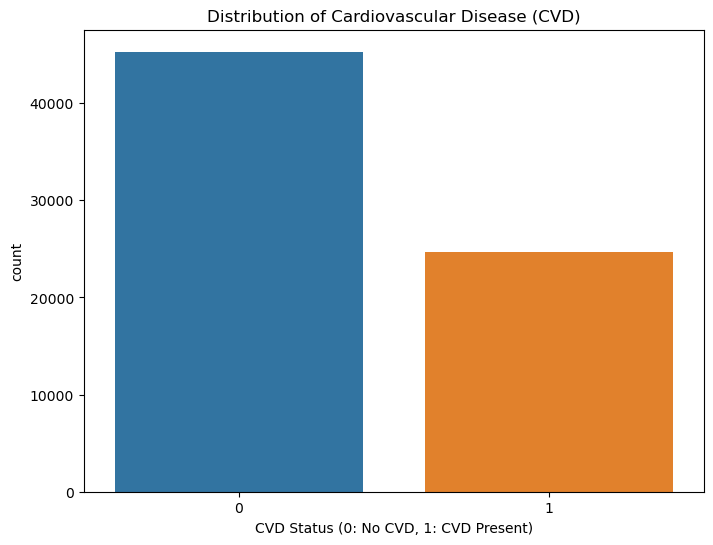

In [26]:
# Countplot of the 'cvd' column
plt.figure(figsize=(8, 6))
sns.countplot(x='cvd', data=df)
plt.title('Distribution of Cardiovascular Disease (CVD)')
plt.xlabel('CVD Status (0: No CVD, 1: CVD Present)')
plt.show()

# Age and Blood Pressure Relationship:

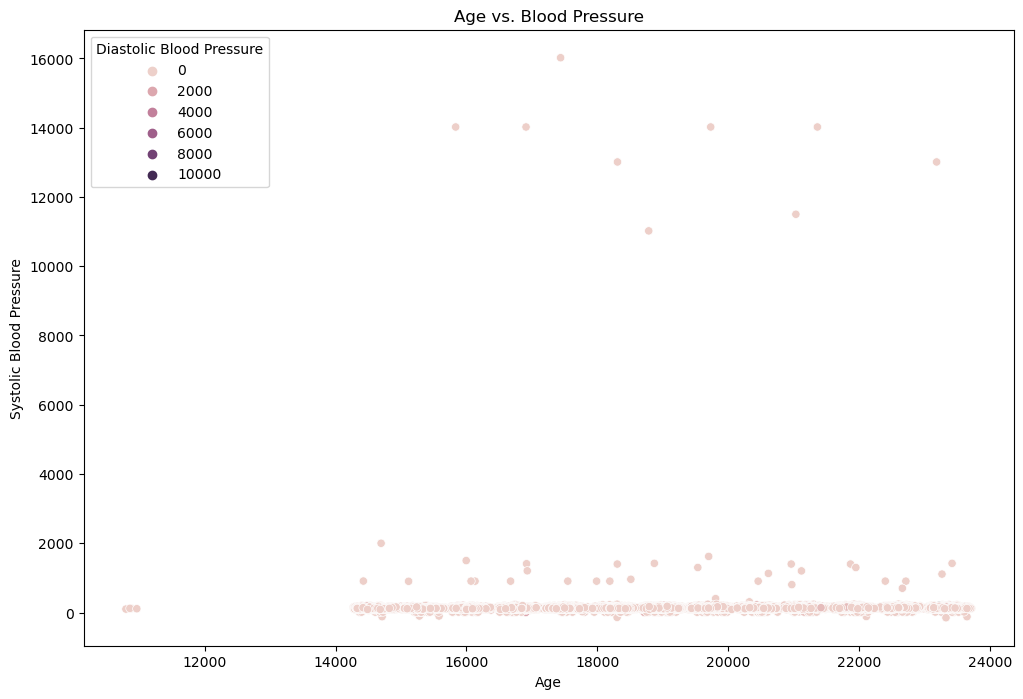

In [27]:
# Scatter plot of age vs. systolic and diastolic blood pressure
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='ap_hi', hue='ap_lo', data=df)
plt.title('Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.legend(title='Diastolic Blood Pressure')
plt.show()

# Gender-based Analysis:

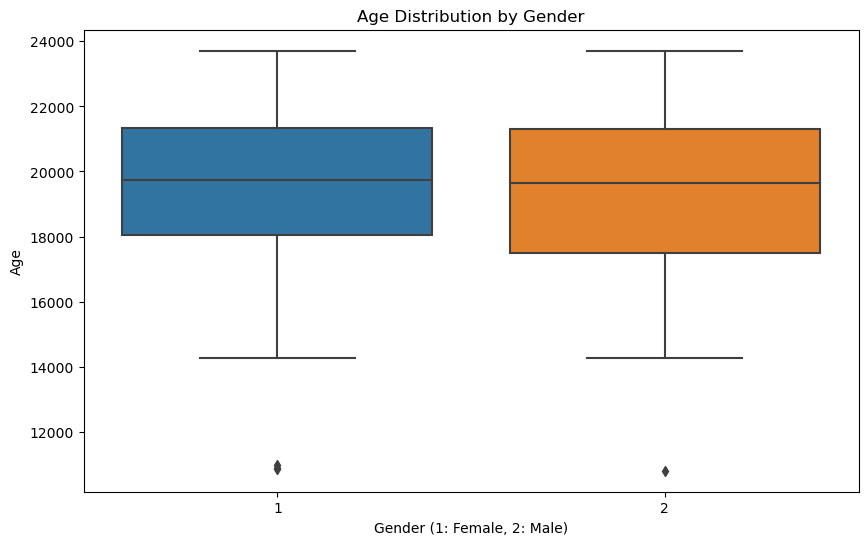

In [28]:
#Analyze health-related factors based on gender.
# Boxplot of age distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Age')
plt.show()

# Heatmap of Selected Variables:

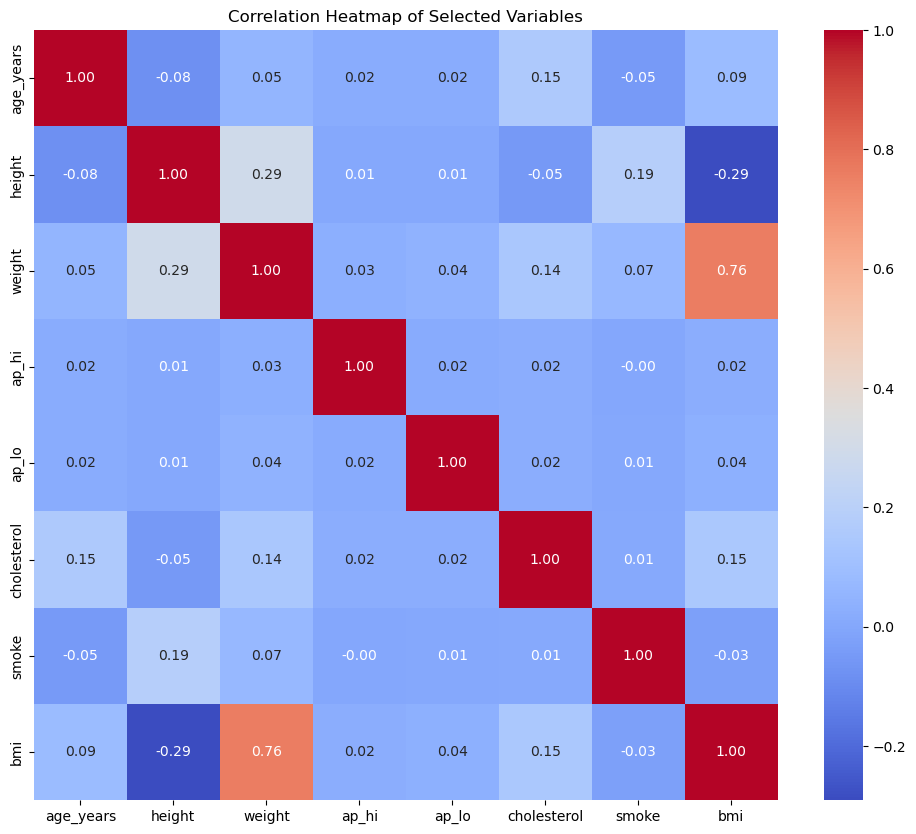

In [29]:
#Visualize relationships between selected variables.
# Select relevant columns for the heatmap
selected_columns = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'bmi']

# Create a heatmap of correlations between selected variables
plt.figure(figsize=(12, 10))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [30]:
# Create a binary column indicating whether the person is over 50 or not
df['over_50'] = df['age_years'] > 50

# Calculate the average cholesterol level for people over 50 and those under or equal to 50
average_cholesterol_by_age = df.groupby('over_50')['cholesterol'].mean()

print("Average cholesterol levels:")
print(f"People under or equal to 50: {average_cholesterol_by_age[False]:.2f}")
print(f"People over 50: {average_cholesterol_by_age[True]:.2f}")

Average cholesterol levels:
People under or equal to 50: 1.25
People over 50: 1.43


In [31]:
# Calculate the percentage increase
percentage_increase = ((average_cholesterol_by_age[True] - average_cholesterol_by_age[False]) / average_cholesterol_by_age[False]) * 100

print(f"The cholesterol level is approximately {percentage_increase:.2f}% higher on average for people over 50 compared to those under or equal to 50.")

The cholesterol level is approximately 14.69% higher on average for people over 50 compared to those under or equal to 50.


In [32]:
# Calculate smoking prevalence for men and women
smoking_prevalence_by_gender = df.groupby('gender')['smoke'].mean()

# Calculate the ratio of smoking prevalence between men and women
smoking_ratio = smoking_prevalence_by_gender[2] / smoking_prevalence_by_gender[1]

# Check the given options
option_1 = smoking_ratio == 7
option_2 = smoking_ratio == 12
option_3 = smoking_ratio == 1/12

# Print the result based on the options
if option_1:
    print("Yes, men are 7x more likely to be smokers.")
elif option_2:
    print("Yes, men are 12x more likely to be smokers.")
elif option_3:
    print("No, women are 12x more likely to be smokers.")
else:
    print("None of the given options accurately reflects the smoking prevalence comparison between men and women.")

None of the given options accurately reflects the smoking prevalence comparison between men and women.


In [33]:
smoker_counts = df.groupby(['gender', 'smoke']).size().unstack()

# Extract the counts for smoker women and smoker men
smoker_women_count = smoker_counts.loc[1, 1] if 1 in smoker_counts.index and 1 in smoker_counts.columns else 0
smoker_men_count = smoker_counts.loc[2, 1] if 2 in smoker_counts.index and 1 in smoker_counts.columns else 0

print(f"Count of smoker women: {smoker_women_count}")
print(f"Count of smoker men: {smoker_men_count}")

Count of smoker women: 813
Count of smoker men: 5356


In [34]:
# Calculate the height threshold for the tallest 1% of people
tallest_1_percent_threshold = np.percentile(df['height'], 99)

print(f"The tallest 1% of people are taller than {tallest_1_percent_threshold:.2f} cm.")

The tallest 1% of people are taller than 184.00 cm.


In [35]:
from scipy.stats import spearmanr

# Assuming your DataFrame is named df

# Select the features for analysis
features_to_compare = ['age', 'weight', 'height', 'ap_hi', 'ap_lo']

# Calculate Spearman rank correlation coefficients for all pairs of features
correlation_matrix = df[features_to_compare].corr(method='spearman')

# Exclude self-correlations and find the pair with the highest correlation
max_corr_pair = correlation_matrix[correlation_matrix != 1].abs().unstack().idxmax()

print(f"The pair of features with the highest Spearman rank correlation is: {max_corr_pair} with correlation coefficient {correlation_matrix.loc[max_corr_pair]}")

The pair of features with the highest Spearman rank correlation is: ('ap_hi', 'ap_lo') with correlation coefficient 0.7354361051379777


In [36]:
# Calculate the mean and standard deviation of height
mean_height = df['height'].mean()
std_dev_height = df['height'].std()

# Calculate the threshold for being more than 2 standard deviations away from the mean
threshold_height = mean_height + 2 * std_dev_height

# Calculate the percentage of people who meet the criteria
percentage_above_threshold = (df['height'] > threshold_height).mean() * 100

print(f"The percentage of people more than 2 standard deviations away from the average height is approximately {percentage_above_threshold:.2f}%.")

The percentage of people more than 2 standard deviations away from the average height is approximately 2.06%.


In [37]:
cardio_alco = pd.read_csv(r"C:\Users\Ali\Desktop\Data Analysis Projects\turing\cardio_alco.csv")

In [38]:
cardio_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [39]:
cardio_alco = pd.read_csv(r"C:\Users\Ali\Desktop\Data Analysis Projects\turing\cardio_alco.csv", delimiter=';', header=0)


In [40]:
cardio_alco.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [41]:
# Convert 'id' and 'alco' columns to numeric
cardio_alco['id'] = pd.to_numeric(cardio_alco['id'])
cardio_alco['alco'] = pd.to_numeric(cardio_alco['alco'])

# Calculate age in years and create a binary column indicating whether the person is over 50
df['age_years'] = (df['age'] // 365).astype(int)
df['over_50'] = df['age_years'] > 50

# Calculate the percentage of the population over 50 that consumes alcohol
percentage_over_50_with_alcohol = (df[df['over_50']]['id'].isin(cardio_alco['id']) & (cardio_alco['alco'] == 1)).mean() * 100

print(f"The percentage of the population over 50 years old that consumes alcohol is approximately {percentage_over_50_with_alcohol:.2f}%.")

# Merge the datasets on 'id' and ignore those without alcohol consumption information
merged_df = pd.merge(df, cardio_alco[['id', 'alco']], on='id', how='inner')

# Display the merged DataFrame
print(merged_df.head())

The percentage of the population over 50 years old that consumes alcohol is approximately 2.42%.
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0  44  14605       1     159    60.0    110     70            1      0   
1  45  20652       1     160    73.0    130     85            1      0   
2  46  21940       2     173    82.0    140     90            3      0   
3  47  20404       1     163    55.0    120     80            1      0   
4  49  18328       2     175    95.0    120     80            1      0   

   age_years        bmi  cvd  over_50  alco  
0         40  23.733238    0    False     0  
1         56  28.515625    0     True     0  
2         60  27.398176    1     True     0  
3         55  20.700817    0     True     0  
4         50  31.020408    0    False     0  


In [42]:
# Calculate the percentage of the population over 50 that consumes alcohol
percentage_over_50_with_alcohol = (merged_df[merged_df['over_50']]['alco'] == 1).mean() * 100

print(f"The percentage of the population over 50 years old that consumes alcohol is approximately {percentage_over_50_with_alcohol:.2f}%.")


The percentage of the population over 50 years old that consumes alcohol is approximately 4.91%.
